## Task 1 - Prediction using Supervised ML

### The Sparks Foundation - GRIP - May'21

### Author: ManishArvind S

#### Linear Regression

#### Problem Statement

Predict the percentage of an student based on the no. of study hours.

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [82]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Plotting Hours vs Score

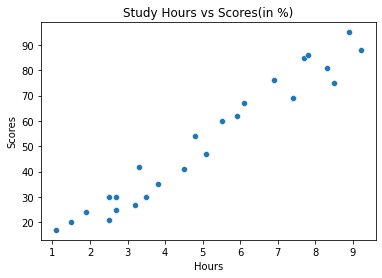

In [83]:
sns.scatterplot(x=df['Hours'],y=df['Scores'])
plt.title('Study Hours vs Scores(in %)')
plt.show()

The above scatter plot depicts a positive linear relationship between hours and scores

#### Dividing data into feature and target variable

In [84]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [85]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [86]:
print('x-train shape',x_train.shape)
print('y-train shape',y_train.shape)
print('x-test shape',x_test.shape)
print('y-test shape',y_test.shape)

x-train shape (20, 1)
y-train shape (20,)
x-test shape (5, 1)
y-test shape (5,)


In [87]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#### Fitting Simple Linear Regression model

In [88]:
model_lr=lr.fit(x_train,y_train)

Predicting on the test set

In [89]:
y_pred=model_lr.predict(x_test)

In [90]:
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


#### Comparing Actual vs Predicted Scores

In [91]:
pd.DataFrame({'Actaul Scores':y_test,'Predicted Scores':[round(i,2) for i in y_pred]})

,Actaul Scores,Predicted Scores
8,81,83.19
16,30,27.03
0,21,27.03
23,76,69.63
11,62,59.95


#### Evaluating model using metrics

In [92]:
from sklearn.metrics import r2_score,mean_squared_error

In [93]:
print('R - square for test data is',round(r2_score(y_test,y_pred),2))

R - square for test data is 0.97


In [94]:
print('RMSE is',round(np.sqrt(mean_squared_error(y_test,y_pred)),2))

RMSE is 4.35


#### What will be the predicted score if a student studies 9.25 hours/day?

In [95]:
study_hours=np.array(9.25).reshape(-1,1)
expected_score=model_lr.predict(study_hours)
print("If the student studies",study_hours[0,0],"hours a day, the score would be",round(expected_score[0],2))

If the student studies 9.25 hours a day, the score would be 92.39
